In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("../data/williams/signatures_dataset/DLP/SNV/snv_counts.csv.gz", low_memory=False)
df

,chr,start,ref,alt,cell_id,patient,endy,state,copy,state_AS_phased,...,alt_counts,sample_id,library_id,total_counts,isabl_patient_id,isabl_sample_id,isabl_aliquot_id,i.isabl_patient_id,i.isabl_sample_id,i.isabl_aliquot_id
0,1,2901334,A,T,SA604X6XB01972-A96177C-R55-C31,SA604,2901334,4,NaN,4|0,...,0,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4724917,C,G,SA604X6XB01972-A96177C-R55-C31,SA604,4724917,4,4.094850,4|0,...,0,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5404076,A,T,SA604X6XB01972-A96177C-R55-C31,SA604,5404076,4,4.663459,4|0,...,1,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6303195,T,G,SA604X6XB01972-A96177C-R55-C31,SA604,6303195,4,3.953550,4|0,...,2,SA604X6XB01972,A96177C,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,11585442,G,T,SA604X6XB01972-A96177C-R55-C31,SA604,11585442,4,3.979188,4|0,...,0,SA604X6XB01972,A96177C,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385546,6,54625196,T,C,AT135-A118389B-R65-C67,SA1292,54625196,2,1.651758,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385547,6,70850297,T,G,AT135-A118389B-R65-C67,SA1292,70850297,2,2.353611,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385548,8,92983198,G,T,AT135-A118389B-R65-C67,SA1292,92983198,1,1.406141,0|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385549,X,85749714,T,A,AT135-A118389B-R65-C67,SA1292,85749714,2,1.866568,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2


In [3]:
df.columns

Index(['chr', 'start', 'ref', 'alt', 'cell_id', 'patient', 'endy', 'state',
       'copy', 'state_AS_phased', 'alleleA', 'alleleB', 'totalcounts', 'BAF',
       'state_min', 'Maj', 'Min', 'LOH', 'phase', 'state_phase', 'state_BAF',
       'ref_counts', 'alt_counts', 'sample_id', 'library_id', 'total_counts',
       'isabl_patient_id', 'isabl_sample_id', 'isabl_aliquot_id',
       'i.isabl_patient_id', 'i.isabl_sample_id', 'i.isabl_aliquot_id'],
      dtype='object')

In [4]:
patient_ids = df['patient'].unique().tolist()
patient_ids

['SA604',
 'SA609',
 'OV2295',
 'DG1134',
 'DG1197',
 'SA501',
 'SA530',
 'SA1182',
 'SA1184',
 'SA1142',
 'SA1162',
 'SA1180',
 'SA1091',
 'SA1093',
 'SA1096',
 'SA1035',
 'SA1047',
 'SA1049',
 'SA1050',
 'SA1051',
 'SA1052',
 'SA1053',
 'SA535',
 'SA610',
 'SA605',
 'SA1181',
 'SA1135',
 'SA039',
 'SA906a',
 'SA906b',
 'SA1054',
 'SA1055',
 'SA1056',
 'SA1188',
 'SA1292']

In [5]:
df_cn_clones = pd.read_csv("../data/williams/signatures_dataset/DLP/CNA/hscn_clones.csv.gz")
df_cn_clones

,patient,clone_id,chr,start,end,state,copy,Min,Maj,alleleA,alleleB,totalcounts,BAF,state_AS_phased,state_AS,state_min,LOH,phase,state_phase,state_BAF
0,SA604,N,1,1,500000.0,4,NaN,0,4,0,0,0,NaN,4|0,4|0,0,LOH,A,A-Hom,0.0
1,SA604,N,1,500001,1000000.0,4,NaN,0,4,0,0,0,NaN,4|0,4|0,0,LOH,A,A-Hom,0.0
2,SA604,N,1,1000001,1500000.0,4,3.291465,0,4,0,0,0,NaN,4|0,4|0,0,LOH,A,A-Hom,0.0
3,SA604,N,1,1500001,2000000.0,4,3.182206,0,4,0,0,0,NaN,4|0,4|0,0,LOH,A,A-Hom,0.0
4,SA604,N,1,2000001,2500000.0,4,3.687108,0,4,10484,37,10521,0.0,4|0,4|0,0,LOH,A,A-Hom,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661746,SA1292,C,X,153000001,153500000.0,2,1.756041,1,1,0,0,0,NaN,1|1,1|1,1,NO,Balanced,Balanced,0.5
1661747,SA1292,C,X,153500001,154000000.0,2,1.569689,1,1,0,0,0,NaN,1|1,1|1,1,NO,Balanced,Balanced,0.5
1661748,SA1292,C,X,154000001,154500000.0,2,2.151393,1,1,0,0,0,NaN,1|1,1|1,1,NO,Balanced,Balanced,0.5
1661749,SA1292,C,X,154500001,155000000.0,2,1.475498,1,1,0,0,0,NaN,1|1,1|1,1,NO,Balanced,Balanced,0.5


In [6]:
import os

path = "../data/williams/scratch"

folders = [
    name for name in os.listdir(path)
    if os.path.isdir(os.path.join(path, name))
]

print(folders)
len(folders)

['SA1050', 'SA1035', 'SA906b', 'SA1093', 'SA1056', 'SA1051', 'SA530', 'SA501', 'SA1184', 'SA1182', 'DG1134', 'SA609', 'SA1162', 'SA535', 'SA1292', 'SA1054', 'SA1053', 'SA1091', 'SA1096', 'SA906a', 'SA1052', 'SA1055', 'SA1142', 'SA1180', 'SA610', 'SA1181', 'SA1188', 'DG1197', 'SA039', 'SA604', 'SA1135', 'OV2295', 'SA605', 'SA1047', 'SA1049']


35

In [7]:
import os

folders_not_with_scope = [
    folder for folder in folders
    if not os.path.isdir(os.path.join(f"../data/williams/scratch/{folder}", "scope_mut_2"))
]

folders_with_scope = [
    folder for folder in folders
    if os.path.isdir(os.path.join(f"../data/williams/scratch/{folder}", "scope_mut_2"))
]


print(folders_not_with_scope)
print(len(folders_with_scope))
print(len(folders_not_with_scope))

['SA1135']
34
1


# Show Results

In [8]:
SCRATCH_PATH = "../data/williams/scratch"

In [29]:
import re

num_solutions = []
solution_counts = []
num_mutations_selected = []
errors = []

for patient_id in patient_ids:
    if os.path.exists(f"{SCRATCH_PATH}/{patient_id}") and os.path.exists(f"{SCRATCH_PATH}/{patient_id}/scope_mut_2"):
        base_dir = f"{SCRATCH_PATH}/{patient_id}/scope_mut_2"
        solution_count = sum(
            1 for name in os.listdir(base_dir)
            if name.startswith("solution") and os.path.isdir(os.path.join(base_dir, name))
        )
        solution_counts.append(solution_count)

        summary_filepath = f"{SCRATCH_PATH}/{patient_id}/scope_mut_2/summary.txt"
        if os.path.exists(summary_filepath):

            with open(summary_filepath, "r") as f:
                content = f.read()

            match = re.search(r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([\d\.]+)", content)

            if match:
                num_solutions = int(match.group(1))
                value = float(match.group(2))
                print(f"{patient_id} num_solutions={num_solutions}, value={value}'")
                num_mutations_selected.append(int(value))
            else:
                print("No matching line found.")
                num_mutations_selected.append(0)
        else: 
            num_mutations_selected.append(0)

    else: 
        solution_counts.append(0)
        num_mutations_selected.append(0)
    

solution_count_df = pd.DataFrame({'patient': patient_ids, 'solution_count': solution_counts, 'num_mutations_selected': num_mutations_selected})
solution_count_df


SA609 num_solutions=24, value=37237.0'
DG1134 num_solutions=19, value=11269.0'
DG1197 num_solutions=12, value=9622.0'
SA530 num_solutions=15, value=9408.0'
SA1184 num_solutions=68, value=4067.0'
SA1162 num_solutions=1, value=13132.0'
SA1091 num_solutions=30, value=5943.0'
SA1093 num_solutions=3, value=9674.0'
SA1050 num_solutions=64, value=16860.0'
SA610 num_solutions=6, value=2919.0'
SA1181 num_solutions=14, value=4507.0'
SA1054 num_solutions=2, value=10578.0'
SA1055 num_solutions=12, value=6502.0'
SA1056 num_solutions=3, value=11195.0'
SA1292 num_solutions=2, value=6348.0'


,patient,solution_count,num_mutations_selected
0,SA604,0,0
1,SA609,24,37237
2,OV2295,0,0
3,DG1134,19,11269
4,DG1197,12,9622
5,SA501,0,0
6,SA530,15,9408
7,SA1182,0,0
8,SA1184,68,4067
9,SA1142,0,0


In [20]:
# import re

# num_solutions = []
# solution_counts = []
# num_mutations_selected = []
# errors = []

# for patient_id in patient_ids:
#     if os.path.exists(f"{SCRATCH_PATH}/{patient_id}") and os.path.exists(f"{SCRATCH_PATH}/{patient_id}/scope_mut"):
#         base_dir = f"{SCRATCH_PATH}/{patient_id}/scope_mut"
#         solution_count = sum(
#             1 for name in os.listdir(base_dir)
#             if name.startswith("solution") and os.path.isdir(os.path.join(base_dir, name))
#         )
#         solution_counts.append(solution_count)

#         summary_filepath = f"{SCRATCH_PATH}/{patient_id}/scope_mut/summary.txt"
#         if os.path.exists(summary_filepath):

#             with open(summary_filepath, "r") as f:
#                 content = f.read()

#             match = re.search(r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([\d\.]+)\s*(.*)", content)

#             if match:
#                 num_solutions = int(match.group(1))
#                 value = float(match.group(2))
#                 error = match.group(3).strip()  # Keep text as-is
#                 print(f"{patient_id} num_solutions={num_solutions}, value={value}, error='{error}'")
#                 num_mutations_selected.append(int(value))
#                 errors.append(error)
#             else:
#                 print("No matching line found.")
#                 num_mutations_selected.append(0)
#                 errors.append("")
#         else: 
#             num_mutations_selected.append(0)
#             errors.append("")

#     else: 
#         solution_counts.append(0)
#         num_mutations_selected.append(0)
#         errors.append("")
    

# solution_count_df = pd.DataFrame({'patient': patient_ids, 'solution_count': solution_counts, 'num_mutations_selected': num_mutations_selected, 'status': errors})
# solution_count_df


In [12]:
df

,chr,start,ref,alt,cell_id,patient,endy,state,copy,state_AS_phased,...,alt_counts,sample_id,library_id,total_counts,isabl_patient_id,isabl_sample_id,isabl_aliquot_id,i.isabl_patient_id,i.isabl_sample_id,i.isabl_aliquot_id
0,1,2901334,A,T,SA604X6XB01972-A96177C-R55-C31,SA604,2901334,4,NaN,4|0,...,0,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4724917,C,G,SA604X6XB01972-A96177C-R55-C31,SA604,4724917,4,4.094850,4|0,...,0,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5404076,A,T,SA604X6XB01972-A96177C-R55-C31,SA604,5404076,4,4.663459,4|0,...,1,SA604X6XB01972,A96177C,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,6303195,T,G,SA604X6XB01972-A96177C-R55-C31,SA604,6303195,4,3.953550,4|0,...,2,SA604X6XB01972,A96177C,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,11585442,G,T,SA604X6XB01972-A96177C-R55-C31,SA604,11585442,4,3.979188,4|0,...,0,SA604X6XB01972,A96177C,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385546,6,54625196,T,C,AT135-A118389B-R65-C67,SA1292,54625196,2,1.651758,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385547,6,70850297,T,G,AT135-A118389B-R65-C67,SA1292,70850297,2,2.353611,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385548,8,92983198,G,T,AT135-A118389B-R65-C67,SA1292,92983198,1,1.406141,0|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2
31385549,X,85749714,T,A,AT135-A118389B-R65-C67,SA1292,85749714,2,1.866568,1|1,...,1,SA1292X20,A118389B,1,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2,184-hTERT,SA1292X20,184-hTERT_SA1292X20_A118389B_L2


In [13]:
df['mutation'] = df['chr'].astype(str) + ":" + df["start"].astype(str) + ":" + df["ref"] + ":" + df["alt"]

In [14]:
mut_counts = (
    df.groupby('patient')['mutation']
      .nunique()
      .reset_index(name='unique_mutations')
)
mut_counts

,patient,unique_mutations
0,DG1134,15642
1,DG1197,14306
2,OV2295,24092
3,SA039,2478
4,SA1035,35318
5,SA1047,3414
6,SA1049,21095
7,SA1050,27266
8,SA1051,25887
9,SA1052,38881


In [15]:
cell_counts = (
    df.groupby('patient')['cell_id']
      .nunique()
      .reset_index(name='unique_cell_id')
)
cell_counts

,patient,unique_cell_id
0,DG1134,113
1,DG1197,77
2,OV2295,1084
3,SA039,1959
4,SA1035,2586
5,SA1047,347
6,SA1049,1283
7,SA1050,990
8,SA1051,892
9,SA1052,556


In [16]:
cn_counts = (
    df_cn_clones.groupby('patient')['clone_id']
      .nunique()
      .reset_index(name='unique_clone_id')
)
cn_counts

,patient,unique_clone_id
0,DG1134,7
1,DG1197,3
2,OV2295,8
3,SA039,8
4,SA1035,11
5,SA1047,2
6,SA1049,8
7,SA1050,8
8,SA1051,3
9,SA1052,8


In [17]:
patient_ids

['SA604',
 'SA609',
 'OV2295',
 'DG1134',
 'DG1197',
 'SA501',
 'SA530',
 'SA1182',
 'SA1184',
 'SA1142',
 'SA1162',
 'SA1180',
 'SA1091',
 'SA1093',
 'SA1096',
 'SA1035',
 'SA1047',
 'SA1049',
 'SA1050',
 'SA1051',
 'SA1052',
 'SA1053',
 'SA535',
 'SA610',
 'SA605',
 'SA1181',
 'SA1135',
 'SA039',
 'SA906a',
 'SA906b',
 'SA1054',
 'SA1055',
 'SA1056',
 'SA1188',
 'SA1292']

In [18]:
patient_ids_ = []
cn_clusters_with_reads = []
for patient_id in patient_ids:
    try:
        F_hi = pd.read_csv(f"../data/williams/scratch/{patient_id}/F_hi.csv")
        patient_ids_.append(patient_id)
        cn_clusters_with_reads.append(F_hi.shape[0])
    except Exception as e:
        print(e)

cn_clusters_with_reads = pd.DataFrame({
    'patient': patient_ids_,
    'cn_clusters_with_reads': cn_clusters_with_reads
})

cn_clusters_with_reads


[Errno 2] No such file or directory: '../data/williams/scratch/SA1135/F_hi.csv'


,patient,cn_clusters_with_reads
0,SA604,14
1,SA609,12
2,OV2295,8
3,DG1134,7
4,DG1197,3
5,SA501,7
6,SA530,3
7,SA1182,2
8,SA1184,8
9,SA1142,2


In [21]:
patient_ids_ = []
cn_clusters_taken = []
num_cn_clusters_taken = []

for patient_id in patient_ids:
    try:
        cn_cell_df = pd.read_csv(f"../data/williams/signatures_dataset/clones_trees/{patient_id}_clones.tsv", sep='\t')

        counts = cn_cell_df['clone_id'].value_counts()
        proportions = counts / counts.sum()

        n_clusters = len(cn_cell_df['clone_id'].unique())

        threshold = (1 / 3) * (1 / n_clusters)

        filtered = proportions[proportions > threshold]
        filtered = filtered.sort_index().index.to_list()
        print(patient_id, filtered)

        patient_ids_.append(patient_id)
        cn_clusters_taken.append(" ".join(filtered))
        num_cn_clusters_taken.append(len(filtered))
    
    except Exception as e:
        print(e)

cn_clusters_taken = pd.DataFrame({
    'patient': patient_ids_,
    'cn_clusters_in_solution': cn_clusters_taken,
    'num_cn_clusters_in_solution': num_cn_clusters_taken
})

cn_clusters_taken

SA604 ['A', 'B', 'C', 'K', 'M', 'N']
SA609 ['C', 'E', 'G', 'H', 'J', 'M', 'O']
OV2295 ['B', 'C', 'D', 'E', 'F', 'G', 'H']
DG1134 ['A', 'B', 'C', 'D', 'E', 'F', 'G']
DG1197 ['A', 'B', 'C']
SA501 ['A', 'D', 'G']
SA530 ['A', 'B', 'C']
SA1182 ['B']
SA1184 ['A', 'B', 'C', 'D', 'E', 'F', 'G']
SA1142 ['B']
SA1162 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1180 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
SA1091 ['A', 'B', 'C', 'D', 'E']
SA1093 ['A', 'B', 'C', 'D']
SA1096 ['A', 'B', 'C', 'G']
SA1035 ['A', 'B', 'C', 'D', 'H', 'J', 'K']
SA1047 ['B']
SA1049 ['A', 'C', 'D', 'G', 'H']
SA1050 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1051 ['B']
SA1052 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1053 ['B', 'D', 'E', 'F', 'G']
SA535 ['B', 'D', 'E', 'G', 'I', 'N', 'O', 'Q']
SA610 ['A', 'B']
SA605 ['B']
SA1181 ['A', 'B', 'C', 'D', 'E', 'F']
'clone_id'
SA039 ['B', 'C', 'F']
SA906a ['A', 'B', 'C', 'D', 'E', 'F', 'J', 'L']
SA906b ['B', 'C', 'E', 'G', 'H', 'I', 'J', 'K']
SA1054 ['A', 'B

,patient,cn_clusters_in_solution,num_cn_clusters_in_solution
0,SA604,A B C K M N,6
1,SA609,C E G H J M O,7
2,OV2295,B C D E F G H,7
3,DG1134,A B C D E F G,7
4,DG1197,A B C,3
5,SA501,A D G,3
6,SA530,A B C,3
7,SA1182,B,1
8,SA1184,A B C D E F G,7
9,SA1142,B,1


In [22]:
total_reads_per_patient = (
    df.groupby('patient')['total_counts']
      .sum()
      .rename('total_reads')
)

total_reads_per_patient

patient
DG1134     280227
DG1197     194574
OV2295    3221337
SA039      118796
SA1035    2596866
SA1047     147282
SA1049    1396643
SA1050    1825302
SA1051    2346145
SA1052    1372756
SA1053    1661168
SA1054     775136
SA1055     652223
SA1056     670716
SA1091     390208
SA1093     534173
SA1096     435313
SA1135      36547
SA1142    4522246
SA1162     263695
SA1180     350927
SA1181     354350
SA1182     122835
SA1184     281554
SA1188    2138359
SA1292     144079
SA501     2236604
SA530      527965
SA535     1796109
SA604     1565653
SA605       55573
SA609     4943221
SA610      158840
SA906a    3190410
SA906b    4928094
Name: total_reads, dtype: int64

In [23]:
cancer_types = [
    ('SA039', 'Cell line WT'),
    ('SA906a', 'Cell line TP53-/- 95.22'),
    ('SA906b', 'Cell line TP53-/- 95.22'),
    ('SA1188', 'Cell line BRCA2+/- TP53-/- 116.66'),
    ('SA1056', 'Cell line BRCA2-/- TP53-/- 116.126'),
    ('SA1055', 'Cell line BRCA2-/- TP53-/- 112.109'),
    ('SA1054', 'Cell line BRCA1-/- TP53-/- 83.86'),
    ('SA1292', 'Cell line BRCA1+/- TP53-/- 116.66'),
    ('SA1091', 'HGSOC FBI'),
    ('SA1047', 'HGSOC TD'),
    ('SA1093', 'HGSOC TD'),
    ('SA1049', 'HGSOC FBI'),
    ('SA1096', 'HGSOC FBI'),
    ('SA1162', 'HGSOC FBI'),
    ('SA1050', 'HGSOC HRD-Dup'),
    ('SA1051', 'HGSOC HRD-Dup'),
    ('SA1052', 'HGSOC HRD-Dup'),
    ('SA1053', 'HGSOC HRD-Dup'),
    ('SA1180', 'HGSOC FBI'),
    ('SA1181', 'HGSOC HRD-Dup'),
    ('SA1182', 'HGSOC FBI'),
    ('SA1184', 'HGSOC HRD-Dup'),
    ('SA530', 'TNBC FBI'),
    ('SA604', 'TNBC FBI'),
    ('SA605', 'TNBC TD'),
    ('SA609', 'TNBC FBI'),
    ('SA610', 'TNBC FBI'),
    ('SA501', 'TNBC HRD-Dup'),
    ('SA535', 'TNBC HRD-Dup'),
]

columns = ['patient', 'cancer_type']

cacncer_type_df = pd.DataFrame(cancer_types, columns=columns)

cacncer_type_df


,patient,cancer_type
0,SA039,Cell line WT
1,SA906a,Cell line TP53-/- 95.22
2,SA906b,Cell line TP53-/- 95.22
3,SA1188,Cell line BRCA2+/- TP53-/- 116.66
4,SA1056,Cell line BRCA2-/- TP53-/- 116.126
5,SA1055,Cell line BRCA2-/- TP53-/- 112.109
6,SA1054,Cell line BRCA1-/- TP53-/- 83.86
7,SA1292,Cell line BRCA1+/- TP53-/- 116.66
8,SA1091,HGSOC FBI
9,SA1047,HGSOC TD


In [24]:
mut_counts.rename(columns={'unique_mutations': 'num_mutations'}, inplace=True)
cell_counts.rename(columns={'unique_cell_id': 'num_cells'}, inplace=True)
cn_counts.rename(columns={'unique_clone_id': 'num_cn_cluster'}, inplace=True)


results_df = pd.merge(mut_counts, cell_counts, on='patient', how='left')
results_df = pd.merge(results_df, cacncer_type_df, on='patient', how='left')
results_df = pd.merge(results_df, cn_counts, on='patient', how='left')
results_df = pd.merge(results_df, total_reads_per_patient, on='patient', how='left')
results_df = pd.merge(results_df, cn_clusters_with_reads, on='patient', how='left')
results_df = pd.merge(results_df, cn_clusters_taken, on='patient', how='left')
results_df = pd.merge(results_df, solution_count_df, on='patient', how='left')

results_df["cancer_type"] = results_df["cancer_type"].fillna('-')
results_df["num_cn_clusters_in_solution"] = results_df["num_cn_clusters_in_solution"].fillna(0).astype(int)
results_df["coverage"] = results_df["total_reads"] / (results_df["num_mutations"] * results_df["num_cells"])

results_df['pct_mutations_selected'] = results_df['num_mutations_selected'] / results_df['num_mutations'] * 100
results_df

,patient,num_mutations,num_cells,cancer_type,num_cn_cluster,total_reads,cn_clusters_with_reads,cn_clusters_in_solution,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected
0,DG1134,15642,113,-,7,280227,7.0,A B C D E F G,7,19,11269,0.158540,72.043217
1,DG1197,14306,77,-,3,194574,3.0,A B C,3,12,9622,0.176635,67.258493
2,OV2295,24092,1084,-,8,3221337,8.0,B C D E F G H,7,7,20339,0.123349,84.422215
3,SA039,2478,1959,Cell line WT,8,118796,7.0,B C F,3,228,1838,0.024472,74.172720
4,SA1035,35318,2586,-,11,2596866,11.0,A B C D H J K,7,0,0,0.028433,0.000000
5,SA1047,3414,347,HGSOC TD,2,147282,2.0,B,1,0,0,0.124324,0.000000
6,SA1049,21095,1283,HGSOC FBI,8,1396643,8.0,A C D G H,5,0,0,0.051604,0.000000
7,SA1050,27266,990,HGSOC HRD-Dup,8,1825302,8.0,A B C D E F G H,8,64,16860,0.067620,61.835253
8,SA1051,25887,892,HGSOC HRD-Dup,3,2346145,3.0,B,1,4,25887,0.101603,100.000000
9,SA1052,38881,556,HGSOC HRD-Dup,8,1372756,8.0,A B C D E F G H,8,1,25115,0.063501,64.594532


In [25]:
results_df.to_csv(f"{path}/results_mut_2.csv")

In [26]:
results_df_filt = results_df[['patient', 'num_cells', 'cancer_type', 'num_cn_clusters_in_solution', 'solution_count', 'num_mutations_selected', 'coverage', 'pct_mutations_selected']]
results_df_filt.to_csv(f"{path}/results_mut_filt_2.csv")
results_df_filt

,patient,num_cells,cancer_type,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected
0,DG1134,113,-,7,19,11269,0.158540,72.043217
1,DG1197,77,-,3,12,9622,0.176635,67.258493
2,OV2295,1084,-,7,7,20339,0.123349,84.422215
3,SA039,1959,Cell line WT,3,228,1838,0.024472,74.172720
4,SA1035,2586,-,7,0,0,0.028433,0.000000
5,SA1047,347,HGSOC TD,1,0,0,0.124324,0.000000
6,SA1049,1283,HGSOC FBI,5,0,0,0.051604,0.000000
7,SA1050,990,HGSOC HRD-Dup,8,64,16860,0.067620,61.835253
8,SA1051,892,HGSOC HRD-Dup,1,4,25887,0.101603,100.000000
9,SA1052,556,HGSOC HRD-Dup,8,1,25115,0.063501,64.594532


In [27]:
results_df_filt[(results_df_filt['cancer_type'] != '-') & (results_df_filt['num_cn_clusters_in_solution'] >= 3)].sort_values('solution_count')

,patient,num_cells,cancer_type,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected
34,SA906b,5716,Cell line TP53-/- 95.22,8,0,0,0.031042,0.000000
6,SA1049,1283,HGSOC FBI,5,0,0,0.051604,0.000000
27,SA530,324,TNBC FBI,3,0,0,0.092141,0.000000
24,SA1188,2003,Cell line BRCA2+/- TP53-/- 116.66,7,0,0,0.063006,0.000000
33,SA906a,3711,Cell line TP53-/- 95.22,8,0,0,0.035617,0.000000
19,SA1162,254,HGSOC FBI,8,1,13132,0.036852,46.615314
20,SA1180,774,HGSOC FBI,13,1,3472,0.073867,56.565657
10,SA1053,825,HGSOC HRD-Dup,5,1,18471,0.059481,54.563984
9,SA1052,556,HGSOC HRD-Dup,8,1,25115,0.063501,64.594532
11,SA1054,382,Cell line BRCA1-/- TP53-/- 83.86,5,2,10578,0.094213,49.113195


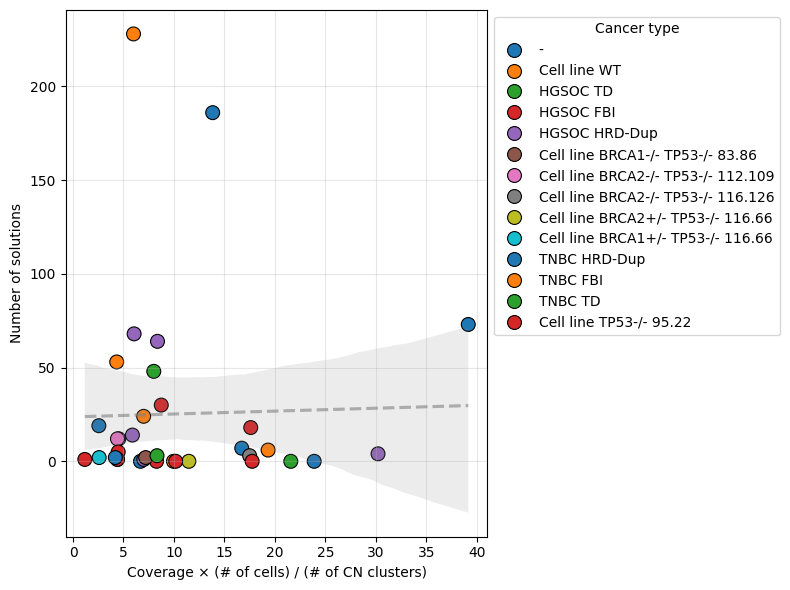

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your summary table
df = results_df

# Compute x-axis variable
df["x_metric"] = (df["coverage"] * df["num_cells"]) / df["num_cn_cluster"]

# Basic scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="x_metric",
    y="solution_count",
    hue="cancer_type",
    s=100,
    palette="tab10",
    edgecolor="black"
)

# Optional: add a trend line (per cancer type or overall)
sns.regplot(
    data=df,
    x="x_metric",
    y="solution_count",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--", "alpha": 0.6}
)

# Labeling
plt.xlabel("Coverage × (# of cells) / (# of CN clusters)")
plt.ylabel("Number of solutions")
plt.legend(title="Cancer type", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


In [42]:
import numpy as np

def consolidate_cancer_type(x):
    if isinstance(x, str):
        x = x.strip()
        if x.startswith("Cell line"):
            return "Cell line"
        elif x.startswith("TNBC"):
            return "TNBC"
        elif x.startswith("HGSOC"):
            return "HGSOC"
        else:
            return "-"
    else:
        return "-"
        
df['consolidated_cancer_type'] = df['cancer_type'].apply(consolidate_cancer_type)

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_19077/4183360270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x_metric"] = (df["coverage"] * df["num_cells"]) / df["num_cn_cluster"]


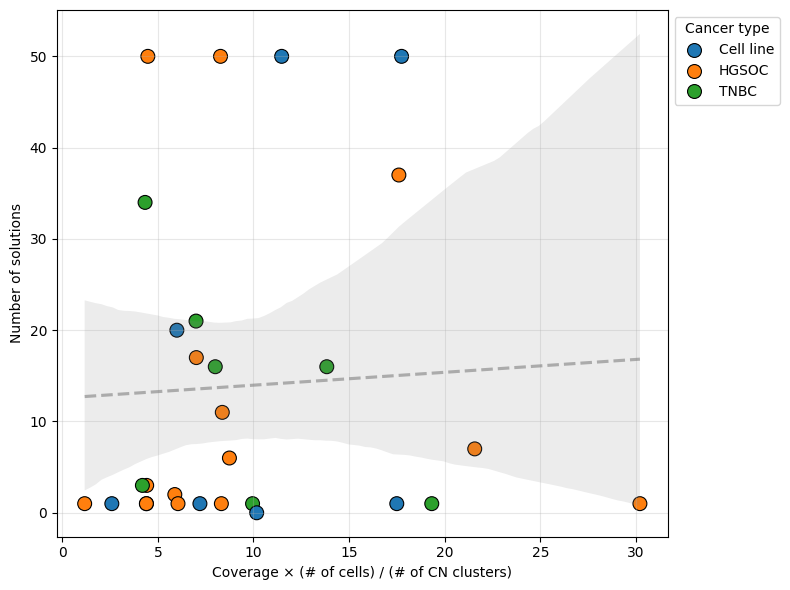

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = results_df[df['consolidated_cancer_type'] != '-']

# Compute x-axis variable
df["x_metric"] = (df["coverage"] * df["num_cells"]) / df["num_cn_cluster"]

# Basic scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="x_metric",
    y="solution_count",
    hue="consolidated_cancer_type",
    s=100,
    palette="tab10",
    edgecolor="black"
)

# Optional: add a trend line (per cancer type or overall)
sns.regplot(
    data=df,
    x="x_metric",
    y="solution_count",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--", "alpha": 0.6}
)

# Labeling
plt.xlabel("Coverage × (# of cells) / (# of CN clusters)")
plt.ylabel("Number of solutions")
plt.legend(title="Cancer type", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()
